In [140]:
import numpy as np
import matplotlib.pyplot as plt


params= {
    "tau":1.0,   #ms  
    "N": 50, 
    "A":40, 
    "epsilon":0.1,
    "dt": 0.1, 
}

In [146]:
def ring_attractor_model(J0, J2, A, N, C, epsilon, tau, dt, T, a):
    theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)
    time_steps = int(T / dt)
    
    delta_theta = 1.0/ N
    
    W = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            W[i, j] = (J0 + J2 * np.cos(2*(theta[i] - theta[j]))) * delta_theta     
            
    theta_cue = 0.0   
    firing_rates = {}    
    
    for c_value in C:
        h = A * c_value * ((1 - epsilon) + epsilon * np.cos(2 * (theta - theta_cue)))
        
        theta_0 = 0.0
        # a = 5.0     # Hz
        # r = np.ones(N) * a
        r = a * np.cos(2 * (theta - theta_0))
        r[r < 0] = 0 
        
        
        for t in range(time_steps):
            # Calculate total input I = h + W*r  
                
            recurrent_input = W.dot(r)
            I_total = h + recurrent_input

            F_I = np.maximum(0, I_total)

            # Update firing rates
            dr = (-r + F_I) / tau
            r = r + dt * dr
            
            r[r < 0] = 0
            


        firing_rates[c_value] = r

    return firing_rates, theta

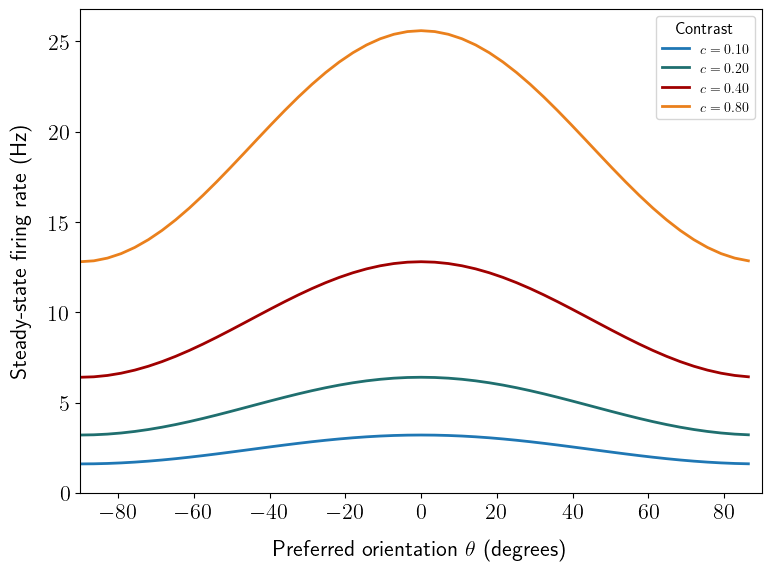

In [147]:
c_values = [0.1, 0.2, 0.4, 0.8]
T1 = 1000  # ms
a1 = 2.0   # Hz

## problem 1 
rates_1, theta_v1= ring_attractor_model(-0.5, 1.0, params["A"], params["N"], c_values, params["epsilon"],
params["tau"], params["dt"], T=T1, a=a1)


plt.rcParams.update({"font.size":16, "text.usetex":True, "figure.figsize":(12, 8)})
plt.figure(figsize=(8,6))
theta_deg = np.degrees(theta_v1)
c_colors    = ['C0', '#1f6f6f', '#a00000', '#ea801c']


for (c, r), col in zip(rates_1.items(), c_colors):
    plt.plot(theta_deg, r, color=col, linewidth=2, label=f"$c={c:.2f}$")
    
plt.xlabel(r'Preferred orientation $\theta$ (degrees)', fontsize=16, labelpad=12)
plt.ylabel(r'Steady‐state firing rate (Hz)', fontsize=16, labelpad=12)
plt.xlim(-90, 90)
plt.ylim(0, None)
plt.legend(title='Contrast', fontsize=10, title_fontsize=12, loc='upper right')


plt.tight_layout()
plt.savefig('problem1_ring.png', dpi=300)
plt.show()

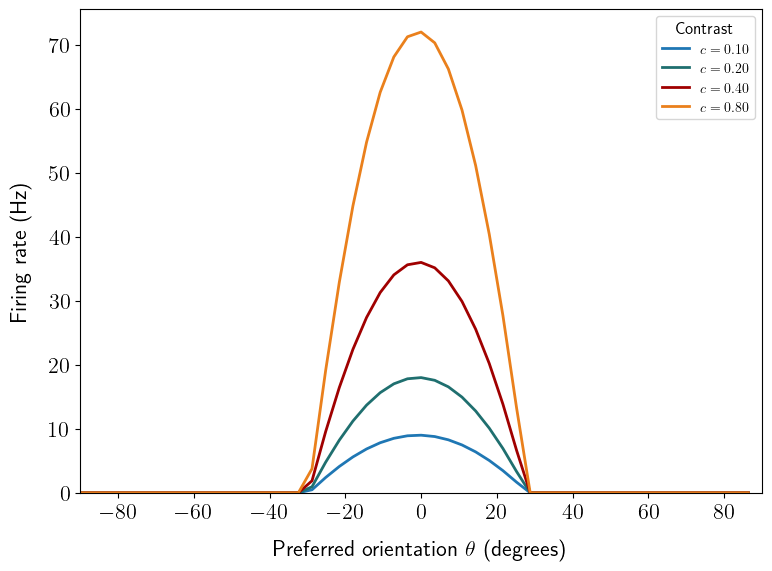

In [148]:
## problem 2 

T2 = 20000  # ms
a2 = 5.0   # Hz

rates_2, theta_v_2= ring_attractor_model(J0=-7.3, J2=11.0, A=params["A"], N=params["N"], C=c_values , epsilon=params["epsilon"],
tau=params["tau"], dt=params["dt"], T=T2, a=a2)

plt.rcParams.update({"font.size":16, "text.usetex":True, "figure.figsize":(12, 8)})
plt.figure(figsize=(8,6))

theta_deg = np.degrees(theta_v_2)

for (c, r), col in zip(rates_2.items(), c_colors):
    plt.plot(theta_deg, r, color=col, linewidth=2, label=f"$c={c:.2f}$")
    

    
plt.xlabel(r'Preferred orientation $\theta$ (degrees)', fontsize=16, labelpad=12)
plt.ylabel(r'Firing rate (Hz)', fontsize=16, labelpad=12)
plt.xlim(-90, 90)
plt.ylim(0, None)
plt.legend(title='Contrast', fontsize=10, title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig('problem2_ring.png', dpi=300)
plt.show()